(40,)


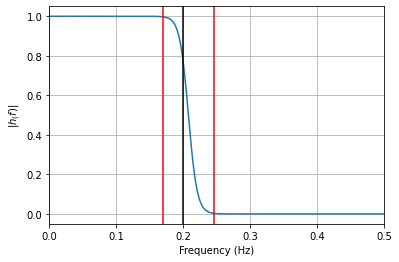

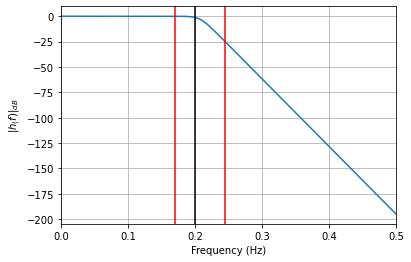

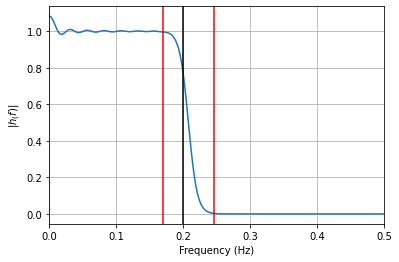

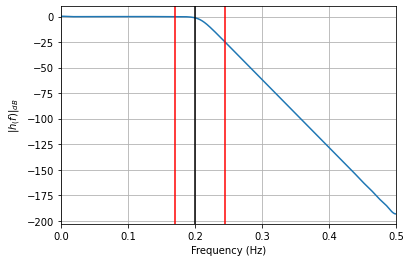

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_frequency_magnitude_response(f, f_c, f_delta, f_delta_stop_perc, abs_h_f_c_stop_dB):

  f_c_2 = f_c + f_delta_stop_perc*f_delta
  f_c_1 = f_c_2 - f_delta

  abs_h_f_c_2 = 10**(abs_h_f_c_stop_dB/10)
  abs_h_f_c_1 = 1 - abs_h_f_c_2

  sigma = (f_c_2 - f_c_1)/np.log((abs_h_f_c_1/abs_h_f_c_2)*((1 - abs_h_f_c_2)/(1 - abs_h_f_c_1)))
  mu = f_c_1  - sigma*np.log((1 - abs_h_f_c_1)/abs_h_f_c_1)
  
  z_score_f = (f - mu)/sigma
  abs_h_f = 1/(1 + np.exp(z_score_f))

  return [f_c_1, f_c_2, f_c, abs_h_f]


def calculateChebyshevPolynomialCoefficients(t, t_delta, f_t, N):

  flipped_cheb_series_n = np.zeros(N)
  flipped_cheb_series_n[0] = 2*np.sum(f_t)*t_delta
  for n in np.arange(1, N, 1):
    flipped_cheb_series_n[n] = 4*np.sum(f_t*np.cos(2*np.pi*n*t))*t_delta

  flipped_cheb_poly_coeffs = np.polynomial.chebyshev.cheb2poly(flipped_cheb_series_n)

  approx_f_t = np.zeros(f_t.shape)
  for n in np.arange(0, N, 1):
    approx_f_t = approx_f_t + flipped_cheb_poly_coeffs[n]*np.power(np.cos(2*np.pi*t), n)
    
  cheb_poly_coeffs = flipped_cheb_poly_coeffs
  scale = cheb_poly_coeffs[0]
  cheb_poly_coeffs = cheb_poly_coeffs/scale

  cheb_poly_roots = np.polynomial.polynomial.polyroots(cheb_poly_coeffs)

  print(np.polynomial.polynomial.polyfromroots(cheb_poly_roots).shape)
  
  return [scale, cheb_poly_roots, approx_f_t]


def showPlots(f, f_c, f_c_1, f_c_2, abs_h_f, approx_reduced_sq_abs_h_f):

  plt.figure()
  plt.plot(f, abs_h_f)
  plt.xlim([0, 0.5])
  plt.axvline(f_c_1, color='r')
  plt.axvline(f_c, color='k')
  plt.axvline(f_c_2, color='r')
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel(r'$|h_(f)|$')

  plt.figure()
  plt.plot(f, 10*np.log10(abs_h_f))
  plt.xlim([0, 0.5])
  plt.axvline(f_c_1, color='r')
  plt.axvline(f_c, color='k')
  plt.axvline(f_c_2, color='r')
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel(r'$|h_(f)|_{dB}$')

  plt.figure()
  plt.plot(f, approx_reduced_sq_abs_h_f)
  plt.xlim([0, 0.5])
  plt.axvline(f_c_1, color='r')
  plt.axvline(f_c, color='k')
  plt.axvline(f_c_2, color='r')
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel(r'$|h_(f)|$')

  plt.figure()
  plt.plot(f, 10*np.log10(approx_reduced_sq_abs_h_f))
  plt.xlim([0, 0.5])
  plt.axvline(f_c_1, color='r')
  plt.axvline(f_c, color='k')
  plt.axvline(f_c_2, color='r')
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel(r'$|h_(f)|_{dB}$')
  
  plt.show()


if(__name__=='__main__'):

  f_c = 0.2
  f_delta = 0.075
  f_delta_stop_perc = 0.6
  abs_h_f_c_stop_dB = -25

  reduction_factor = 20
  N = 40

  f_step = 0.0001

  ###########################################################################################
  ###########################################################################################

  f = np.arange(0, 0.5 + f_step, f_step)

  [f_c_1, f_c_2, f_c, abs_h_f] = calculate_frequency_magnitude_response(f, f_c, f_delta, f_delta_stop_perc, abs_h_f_c_stop_dB)

  reduced_sq_abs_h_f = abs_h_f**(2/reduction_factor)

  [scale, cheb_poly_roots, approx_reduced_sq_abs_h_f] = calculateChebyshevPolynomialCoefficients(f, f_step, reduced_sq_abs_h_f, N)

  showPlots(f, f_c, f_c_1, f_c_2, abs_h_f, approx_reduced_sq_abs_h_f**(reduction_factor/2))

